In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load the trainining data
train = pd.read_csv('Google_Stock_Price_Train.csv')
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
## converting 'Date' to datetime and setting as index

train['Date'] = train['Date'].apply(lambda date: pd.to_datetime(date))

train.set_index('Date', inplace=True)

train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


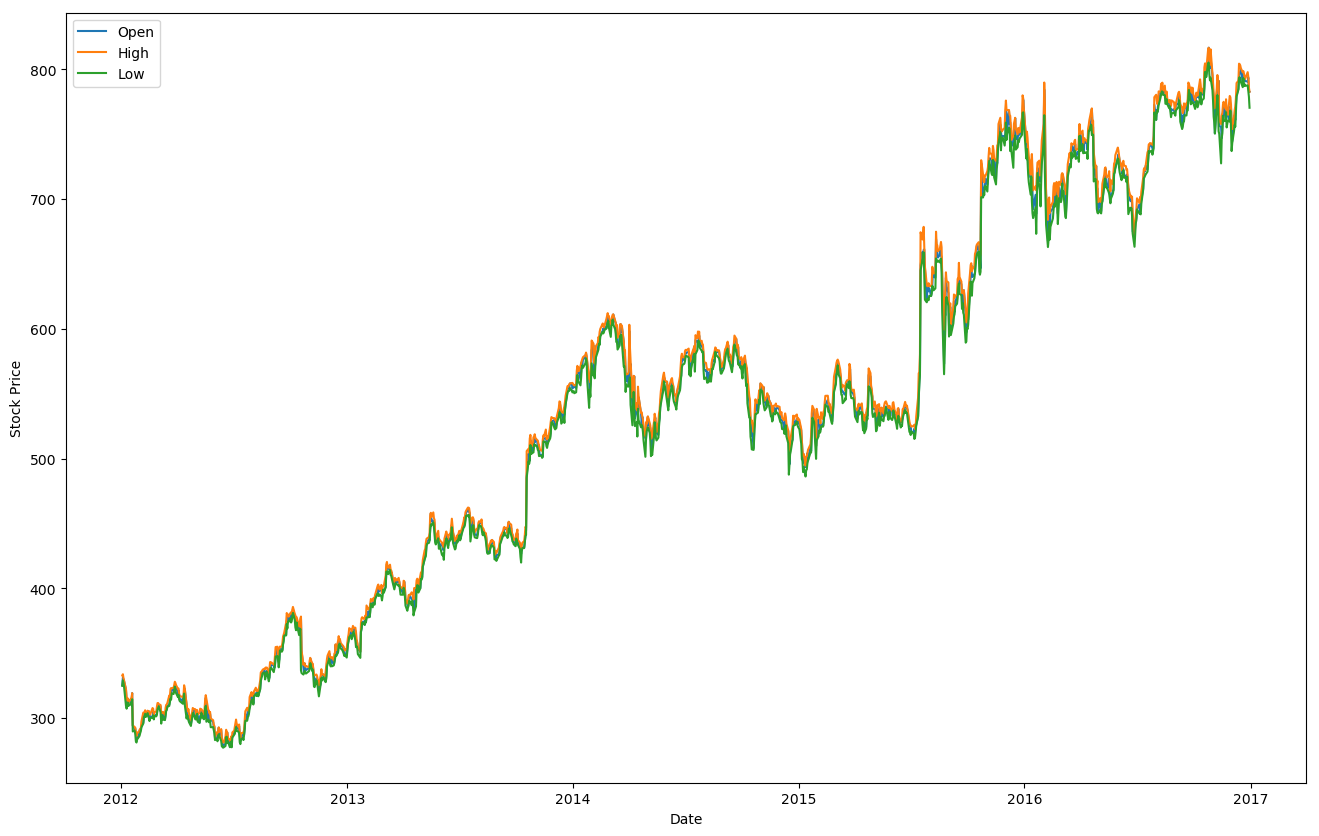

In [4]:
## plot

%matplotlib inline

fig, ax = plt.subplots(figsize=(16,10))

ax.plot(train['Open'])
ax.plot(train['High'])
ax.plot(train['Low'])
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.legend(['Open','High', 'Low'])

plt.show()

In [5]:
## loading test data

test = pd.read_csv('Google_Stock_Price_Test.csv')
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [6]:
train.shape

(1258, 5)

In [7]:
test.shape

(20, 6)

In [8]:
train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
train_data = train.values[:,1:2]

In [10]:
## data normalisation
## normalisation is preferred over standardisation for RNNs with sigmoid in output layer

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0,1))

In [11]:
scaled_train_data = mms.fit_transform(train_data)

In [12]:
scaled_train_data

array([[0.09640129],
       [0.09834351],
       [0.09251685],
       ...,
       [0.95807422],
       [0.94257381],
       [0.93669113]])

In [13]:
train_data

array([[332.83],
       [333.87],
       [330.75],
       ...,
       [794.23],
       [785.93],
       [782.78]], dtype=object)

In [14]:
## NUMBER OF TIME STEPS (EXTREMELY IMPORTANT)
## TELLS THE MODEL WHAT IT NEEDS TO REMEBER IN ORDER TO MAKE THE PREDICTION

In [15]:
## BASICALLY -> use <time steps> previous values for prediction
## taking time steps = 60

In [16]:
time_steps = 60

In [17]:
X = list()
y = list()

for i in range(time_steps, len(scaled_train_data)):
    X.append(scaled_train_data[i-time_steps:i,0].reshape(time_steps))
    y.append(scaled_train_data[i,0])
    
X, y = np.array(X), np.array(y)

In [18]:
X

array([[0.09640129, 0.09834351, 0.09251685, ..., 0.07903337, 0.08276841,
        0.08751191],
       [0.09834351, 0.09251685, 0.08881917, ..., 0.08276841, 0.08751191,
        0.08564439],
       [0.09251685, 0.08881917, 0.07671765, ..., 0.08751191, 0.08564439,
        0.08274973],
       ...,
       [0.92416008, 0.92909033, 0.93536519, ..., 0.95637477, 0.95529161,
        0.96485331],
       [0.92909033, 0.93536519, 0.93239584, ..., 0.95529161, 0.96485331,
        0.95807422],
       [0.93536519, 0.93239584, 0.93086447, ..., 0.96485331, 0.95807422,
        0.94257381]])

In [19]:
y

array([0.08564439, 0.08274973, 0.07718453, ..., 0.95807422, 0.94257381,
       0.93669113])

In [20]:
## ADDING A NEW DIMESION TO X_TRAIN

## TWO REASONS:
## ONE --> KERAS RNN LAYERS NEED AN INPUT OF DIMESION (BATCH_SIZE, TIMESTEPS, INPUT_DIM), INPUT_DIM --> NO. OF PREDICTORS
## TWO --> IT ENABLES US TO ADD OTHER PREDICTORS FOR TRAINING. E.G., STOCK PRICES FOR SIMILAR TECH COMPANIES

In [21]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [22]:
## TRAIN VALIDATION SPLIT

from sklearn.model_selection import train_test_split

In [23]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=27)

In [24]:
##BUILDING THE RNN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages

In [26]:
## MODEL BUILDING

## initialization
regressor = Sequential()

## LSTM 1
regressor.add(LSTM(units=X_train.shape[1], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
regressor.add(Dropout(rate=0.2)) ## turns off 20% perceptrons during training to prevent overfitting

## LSTM 2
regressor.add(LSTM(units=X_train.shape[1], return_sequences=True))
regressor.add(Dropout(rate=0.2)) ## turns off 20% perceptrons during training to prevent overfitting

## LSTM 3
regressor.add(LSTM(units=X_train.shape[1], return_sequences=True))
regressor.add(Dropout(rate=0.2)) ## turns off 20% perceptrons during training to prevent overfitting

## LSTM 2
regressor.add(LSTM(units=X_train.shape[1]))
regressor.add(Dropout(rate=0.2)) ## turns off 20% perceptrons during training to prevent overfitting

## Output
regressor.add(Dense(units=1))

## Compile
regressor.compile(optimizer='adam', loss='mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [27]:
history = regressor.fit(x=X_train, y=y_train, batch_size=32, epochs=300, validation_data=[X_validation, y_validation])

Train on 958 samples, validate on 240 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/300
958/958 [==============================] - 7s 7ms/sample - loss: 0.0673 - val_loss: 0.0076
Epoch 2/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0082 - val_loss: 0.0028
Epoch 3/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0052 - val_loss: 0.0018
Epoch 4/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0047 - val_loss: 0.0019
Epoch 5/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0046 - val_loss: 0.0019
Epoch 6/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0049 - val_loss: 0.0025
Epoch 7/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0048 - val_loss: 0.0025
Epoch 8/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0040 - val_loss: 0.0019
Epoch 9/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.004

958/958 [==============================] - 4s 4ms/sample - loss: 0.0017 - val_loss: 8.4973e-04
Epoch 77/300
958/958 [==============================] - 5s 5ms/sample - loss: 0.0018 - val_loss: 8.5351e-04
Epoch 78/300
958/958 [==============================] - 5s 5ms/sample - loss: 0.0018 - val_loss: 6.8422e-04
Epoch 79/300
958/958 [==============================] - 4s 5ms/sample - loss: 0.0018 - val_loss: 8.4852e-04
Epoch 80/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0018 - val_loss: 6.7832e-04
Epoch 81/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0019 - val_loss: 0.0011
Epoch 82/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0019 - val_loss: 6.6219e-04
Epoch 83/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0017 - val_loss: 6.9972e-04
Epoch 84/300
958/958 [==============================] - 5s 5ms/sample - loss: 0.0020 - val_loss: 7.0944e-04
Epoch 85/300
958/958 [=======================

958/958 [==============================] - 4s 5ms/sample - loss: 0.0010 - val_loss: 3.3702e-04
Epoch 152/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0011 - val_loss: 4.7987e-04
Epoch 153/300
958/958 [==============================] - 4s 5ms/sample - loss: 0.0012 - val_loss: 4.2627e-04
Epoch 154/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0015 - val_loss: 3.5553e-04
Epoch 155/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0012 - val_loss: 7.1175e-04
Epoch 156/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0011 - val_loss: 3.4195e-04
Epoch 157/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0012 - val_loss: 3.2663e-04
Epoch 158/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0011 - val_loss: 5.4996e-04
Epoch 159/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0012 - val_loss: 8.8021e-04
Epoch 160/300
958/958 [==========

958/958 [==============================] - 4s 4ms/sample - loss: 9.6534e-04 - val_loss: 4.1101e-04
Epoch 226/300
958/958 [==============================] - 4s 4ms/sample - loss: 0.0010 - val_loss: 4.4852e-04
Epoch 227/300
958/958 [==============================] - 4s 4ms/sample - loss: 8.3876e-04 - val_loss: 2.7458e-04
Epoch 228/300
958/958 [==============================] - 4s 4ms/sample - loss: 9.9236e-04 - val_loss: 4.3824e-04
Epoch 229/300
958/958 [==============================] - 4s 4ms/sample - loss: 9.8576e-04 - val_loss: 3.3025e-04
Epoch 230/300
958/958 [==============================] - 4s 4ms/sample - loss: 9.4009e-04 - val_loss: 5.2019e-04
Epoch 231/300
958/958 [==============================] - 4s 4ms/sample - loss: 9.6947e-04 - val_loss: 2.4821e-04
Epoch 232/300
958/958 [==============================] - 4s 4ms/sample - loss: 9.1167e-04 - val_loss: 4.1319e-04
Epoch 233/300
958/958 [==============================] - 4s 4ms/sample - loss: 9.4002e-04 - val_loss: 3.3004e-04
E

Epoch 298/300
958/958 [==============================] - 4s 4ms/sample - loss: 8.8097e-04 - val_loss: 2.6809e-04
Epoch 299/300
958/958 [==============================] - 4s 4ms/sample - loss: 7.8964e-04 - val_loss: 3.0266e-04
Epoch 300/300
958/958 [==============================] - 4s 4ms/sample - loss: 7.8331e-04 - val_loss: 3.2708e-04


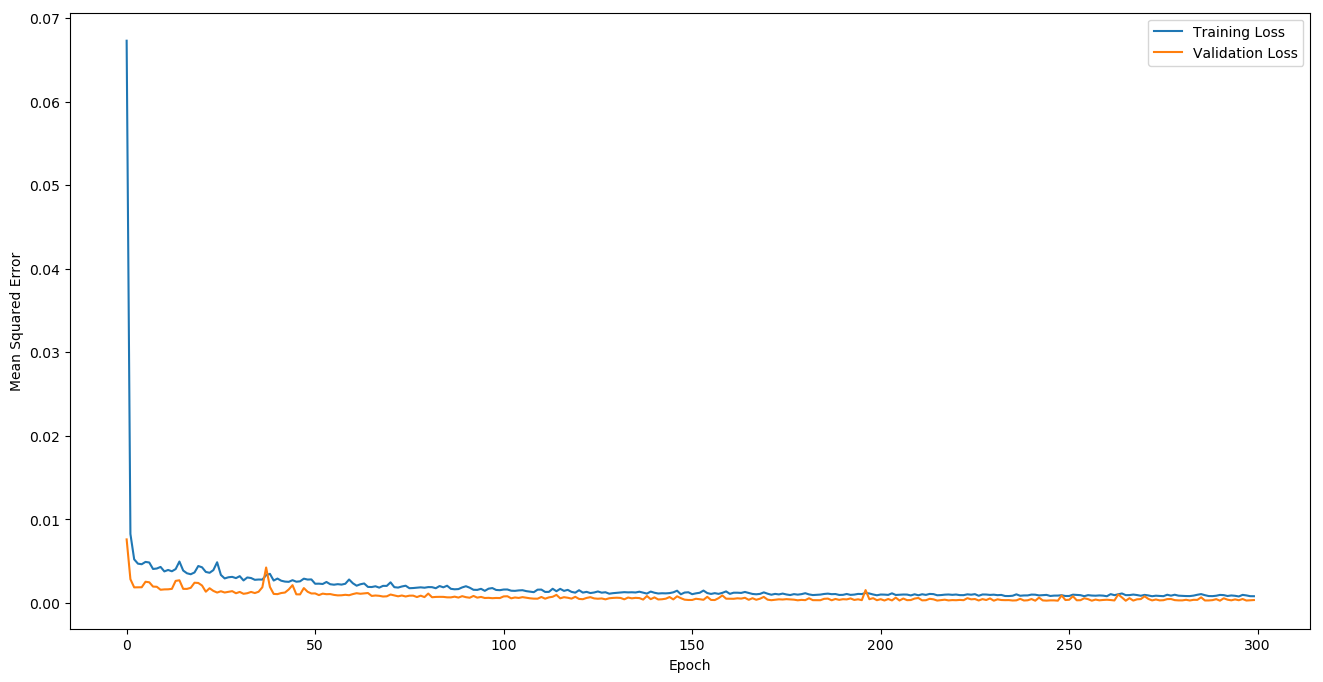

In [28]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['Training Loss', 'Validation Loss'])

plt.show()

In [29]:
## getting the test set
test = pd.read_csv('Google_Stock_Price_Test.csv')
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [30]:
test_data = test.values[:,1:2]

In [31]:
test_data

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4],
       [807.86],
       [805.0],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]], dtype=object)

In [32]:
mms.transform(test_data)

array([[0.92927708],
       [0.94711188],
       [0.94285394],
       [0.95999776],
       [0.98080191],
       [0.98352849],
       [0.97818739],
       [0.98218388],
       [0.98281883],
       [0.98207182],
       [0.97970008],
       [0.97841149],
       [0.98175435],
       [0.9823893 ],
       [1.01049545],
       [1.02416569],
       [1.03946066],
       [1.03367135],
       [0.99622761],
       [0.96298579]])

In [37]:
test['Date'] = test['Date'].apply(lambda date: pd.to_datetime(date))

test.set_index('Date', inplace=True)

test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [38]:
test

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"


In [58]:
total_data = pd.concat((train['Open'], test['Open']), axis=0)

In [59]:
total_data

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2017-01-25    829.62
2017-01-26    837.81
2017-01-27    834.71
2017-01-30    814.66
2017-01-31    796.86
Name: Open, Length: 1278, dtype: float64

In [69]:
X_test = []
y_test = []

test_indices = [i for i in range(len(total_data)) if total_data.index[i].year == 2017]

for i in test_indices:
    X_test.append(total_data.values[i-time_steps:i])
    y_test.append(total_data.values[i])

In [70]:
X_test = np.array(X_test)

In [71]:
X_test

array([[779.  , 779.66, 777.71, ..., 793.7 , 783.33, 782.75],
       [779.66, 777.71, 786.66, ..., 783.33, 782.75, 778.81],
       [777.71, 786.66, 783.76, ..., 782.75, 778.81, 788.36],
       ...,
       [795.47, 782.89, 778.2 , ..., 822.3 , 829.62, 837.81],
       [782.89, 778.2 , 767.25, ..., 829.62, 837.81, 834.71],
       [778.2 , 767.25, 750.66, ..., 837.81, 834.71, 814.66]])

In [72]:
X_test.shape

(20, 60)

In [73]:
y_test = np.array(y_test)

In [74]:
y_test

array([778.81, 788.36, 786.08, 795.26, 806.4 , 807.86, 805.  , 807.14,
       807.48, 807.08, 805.81, 805.12, 806.91, 807.25, 822.3 , 829.62,
       837.81, 834.71, 814.66, 796.86])

In [76]:
## inputs

In [82]:
inputs = total_data[min(test_indices)-60:].values

In [83]:
inputs.shape

(80,)

In [84]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [86]:
inputs = inputs.reshape(-1,1)

In [87]:
inputs.shape

(80, 1)

In [89]:
inputs = mms.transform(inputs)

In [90]:
inputs

array([[0.92963191],
       [0.93086447],
       [0.92722281],
       [0.9439371 ],
       [0.9385213 ],
       [0.9337778 ],
       [0.93458084],
       [0.93112593],
       [0.94615945],
       [0.96556296],
       [0.97501261],
       [0.9595122 ],
       [0.97800063],
       [1.        ],
       [0.98068986],
       [0.97071731],
       [0.98444357],
       [0.96038994],
       [0.93689656],
       [0.9281379 ],
       [0.90768857],
       [0.87670644],
       [0.92122808],
       [0.93784899],
       [0.93138738],
       [0.95235961],
       [0.88768745],
       [0.88593198],
       [0.8698153 ],
       [0.88518498],
       [0.90707229],
       [0.91538275],
       [0.89902329],
       [0.91773582],
       [0.90858498],
       [0.90210469],
       [0.89414907],
       [0.91568155],
       [0.91295497],
       [0.88936822],
       [0.86537061],
       [0.88987245],
       [0.90298243],
       [0.89601658],
       [0.91745569],
       [0.93149943],
       [0.94091172],
       [0.957

In [92]:
X_test = list()
y_test = list()

for i in range(time_steps, len(inputs)):
    X_test.append(inputs[i-time_steps:i,0].reshape(time_steps))
    y_test.append(inputs[i,0])
    
X_test, y_test = np.array(X_test), np.array(y_test)

In [103]:
X_test.shape

(20, 60)

In [94]:
X_test.shape

(20, 60)

In [95]:
y_test

array([0.92927708, 0.94711188, 0.94285394, 0.95999776, 0.98080191,
       0.98352849, 0.97818739, 0.98218388, 0.98281883, 0.98207182,
       0.97970008, 0.97841149, 0.98175435, 0.9823893 , 1.01049545,
       1.02416569, 1.03946066, 1.03367135, 0.99622761, 0.96298579])

In [96]:
y_test.shape

(20,)

In [99]:
X_test = np.reshape(X_test, (X_test[0], X_test[1], 1))

TypeError: only integer scalar arrays can be converted to a scalar index

In [101]:
X_test.shape

(20, 60)

In [102]:
X_test.reshape((X_test[0], X_test[1], 1))

TypeError: only integer scalar arrays can be converted to a scalar index

In [106]:
X_test.shape

(20, 60, 1)

In [107]:
y_test

array([0.92927708, 0.94711188, 0.94285394, 0.95999776, 0.98080191,
       0.98352849, 0.97818739, 0.98218388, 0.98281883, 0.98207182,
       0.97970008, 0.97841149, 0.98175435, 0.9823893 , 1.01049545,
       1.02416569, 1.03946066, 1.03367135, 0.99622761, 0.96298579])

In [108]:
preds = regressor.predict(X_test)

In [109]:
preds

array([[0.9538065 ],
       [0.94881207],
       [0.96284306],
       [0.95763946],
       [0.97120094],
       [0.98815525],
       [0.9880539 ],
       [0.98429686],
       [0.9902156 ],
       [0.99128777],
       [0.99049336],
       [0.98927504],
       [0.98896635],
       [0.9920997 ],
       [0.99243194],
       [1.0155008 ],
       [1.0241609 ],
       [1.0349715 ],
       [1.0308893 ],
       [1.003293  ]], dtype=float32)

In [115]:
comparison = pd.DataFrame(index=test.index)

In [116]:
comparison

""
Date
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-01-09
2017-01-10
2017-01-11
2017-01-12
2017-01-13


In [117]:
comparison['Real'] = y_test
comparison['Predicted'] = preds

In [118]:
comparison

,Real,Predicted
Date,,
2017-01-03,0.929277,0.953807
2017-01-04,0.947112,0.948812
2017-01-05,0.942854,0.962843
2017-01-06,0.959998,0.957639
2017-01-09,0.980802,0.971201
2017-01-10,0.983528,0.988155
2017-01-11,0.978187,0.988054
2017-01-12,0.982184,0.984297
2017-01-13,0.982819,0.990216


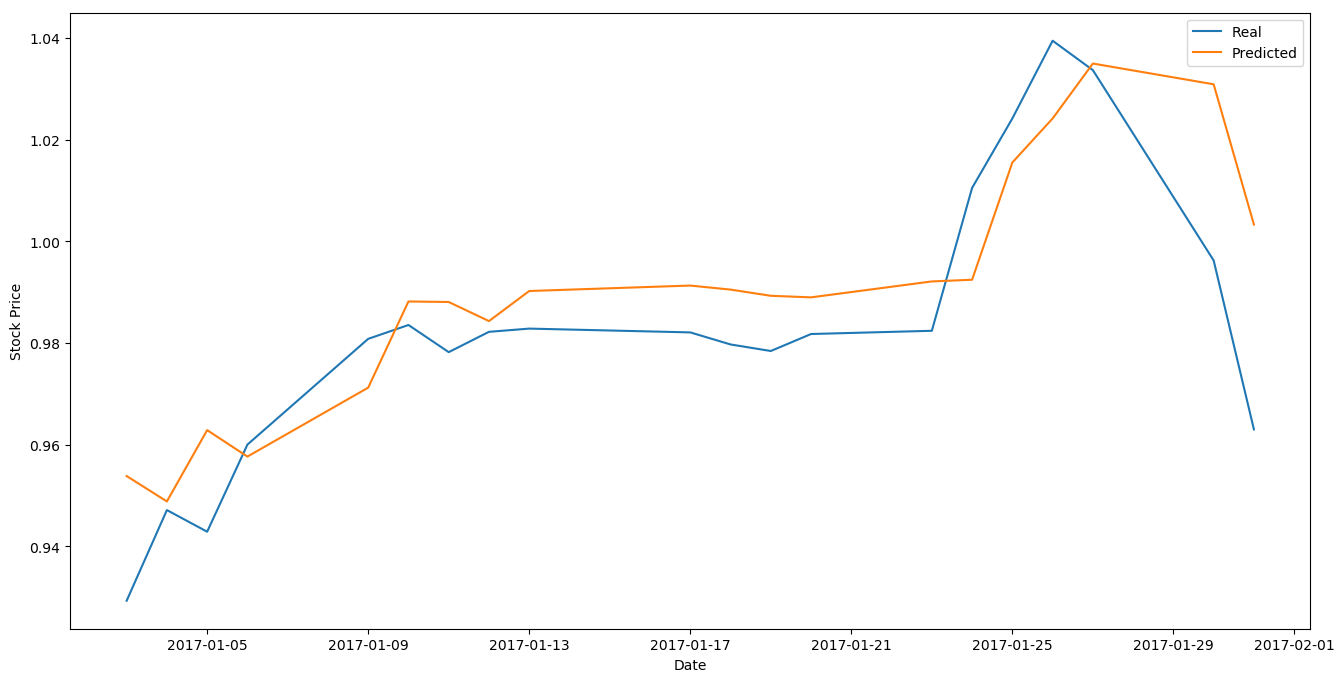

In [119]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(comparison['Real'])
ax.plot(comparison['Predicted'])
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.legend(['Real', 'Predicted'])

plt.show()

In [120]:
mms.inverse_transform(preds)

array([[791.9448 ],
       [789.2704 ],
       [796.78357],
       [793.9972 ],
       [801.259  ],
       [810.3375 ],
       [810.28326],
       [808.2714 ],
       [811.44073],
       [812.01483],
       [811.5895 ],
       [810.9371 ],
       [810.77185],
       [812.4496 ],
       [812.6275 ],
       [824.9802 ],
       [829.61743],
       [835.4062 ],
       [833.2203 ],
       [818.44336]], dtype=float32)